In [1]:
#타이타닉 생존자 분류

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#그래프 모양 설정
plt.style.use('seaborn-v0_8')
#글자 크기 설정
sns.set(font_scale = 2.5)

#경고 메시지가 출력되지 않도록 설정
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
#데이터 읽기
#train.csv 파일을 읽어서 df_train에 저장
df_train = pd.read_csv('train.csv')

In [4]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
#각 컬럼의 개수, 평균, 표준편차, 최소값 등을 출력
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
len(df_train)

891

In [7]:
#각 컬럼의 널값의 수 조회
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [8]:
#각 컬럼의 널값의 비율 조회
#각 컬럼의 널값의 수
df_train.isnull().sum()/len(df_train)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Survived       0.000000
dtype: float64

In [9]:
! pip install missingno

<Axes: >

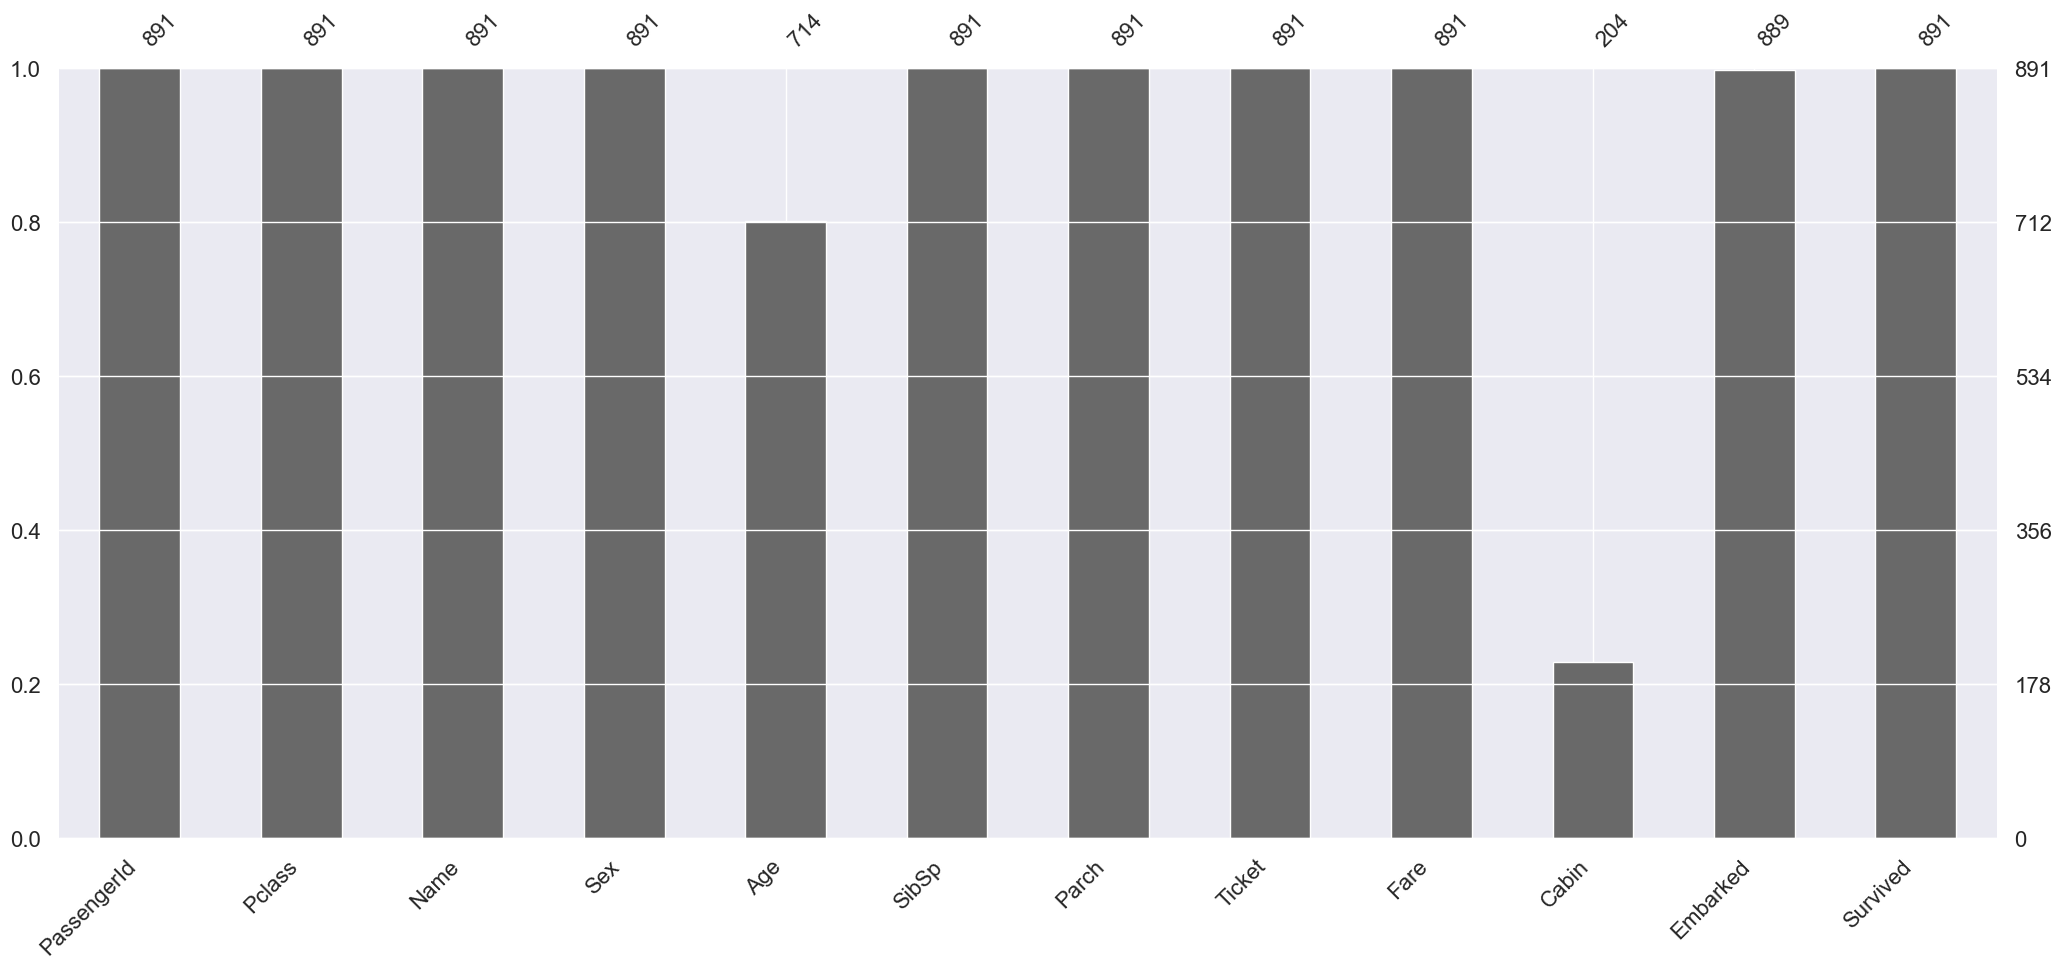

In [10]:
import missingno as msno

#각 컬럼의 null이 아닌 데이터의 비율을 그래프로 나타냄
msno.bar(df = df_train)

In [11]:
#생존과 관련 있는 컬럼 탐색

#Serviced 컬럼에 저장된 값들의 빈도수 조회
#0: 사망자, 1: 생존자
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
#PClass 컬럼과 생존률 관계 탐색

#티켓 클래스의 빈도수 조회
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [13]:
#각 줄에 생존자 존재 여부 조회
df_train['Survived'] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [14]:
#생존자가 존재하는 줄의 데이터 조회
df_train[df_train['Survived'] == 1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,1
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
880,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1


In [15]:
#생존자가 존재하는 줄의 PClass 칸 조회
df_train[df_train['Survived'] == 1]["Pclass"]

1      1
2      3
3      1
8      3
9      2
      ..
875    3
879    1
880    2
887    1
889    1
Name: Pclass, Length: 342, dtype: int64

In [16]:
#생존자가 존재하는 줄의 PClass 칸의 빈도 조회
df_train[df_train['Survived'] == 1]["Pclass"].value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [17]:
#Pclass 칸과 Survived칸을 교차해서 빈도수를 출력
#margins: Pclass칸과 Survived 칸의 빈도수 합계를 출력(True)
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [18]:
#위와 같이 Pclass가 좋을수록(1st) 생존률이 높음

In [19]:
#성별과 생존률 관계 탐색

#Sex와 Survived칸을 교차해서 빈도수, 빈도수의 합계를 출력
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


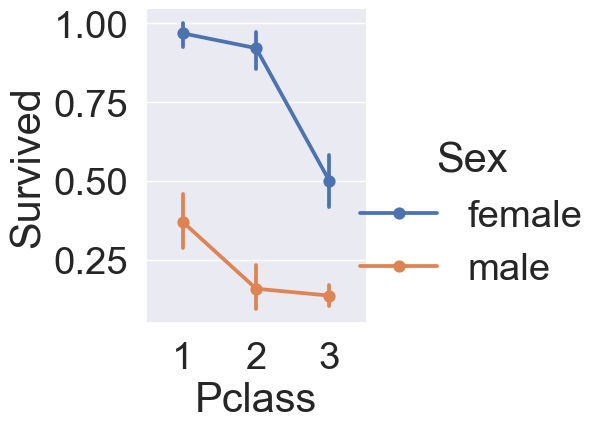

In [20]:
#각 성별별 Pclass 컬럼과 Survived 컬럼을 교차하여 그래프 생성

sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train, kind = "point")

In [21]:
#위와 같이 남성보다 여성의 생존률이 높음

In [22]:
# 나이(age)와 생존률 관계

#age 컬럼에서 생존자가 존재하는 행을 survived_age에 대입
survived_age = df_train['Age'][df_train['Survived'] == 1]
survived_age

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [23]:
#age 컬럼에서 생존자가 존재하지 않는 행을 dead_age에 대입
dead_age = df_train['Age'][df_train['Survived'] == 0]
dead_age

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64

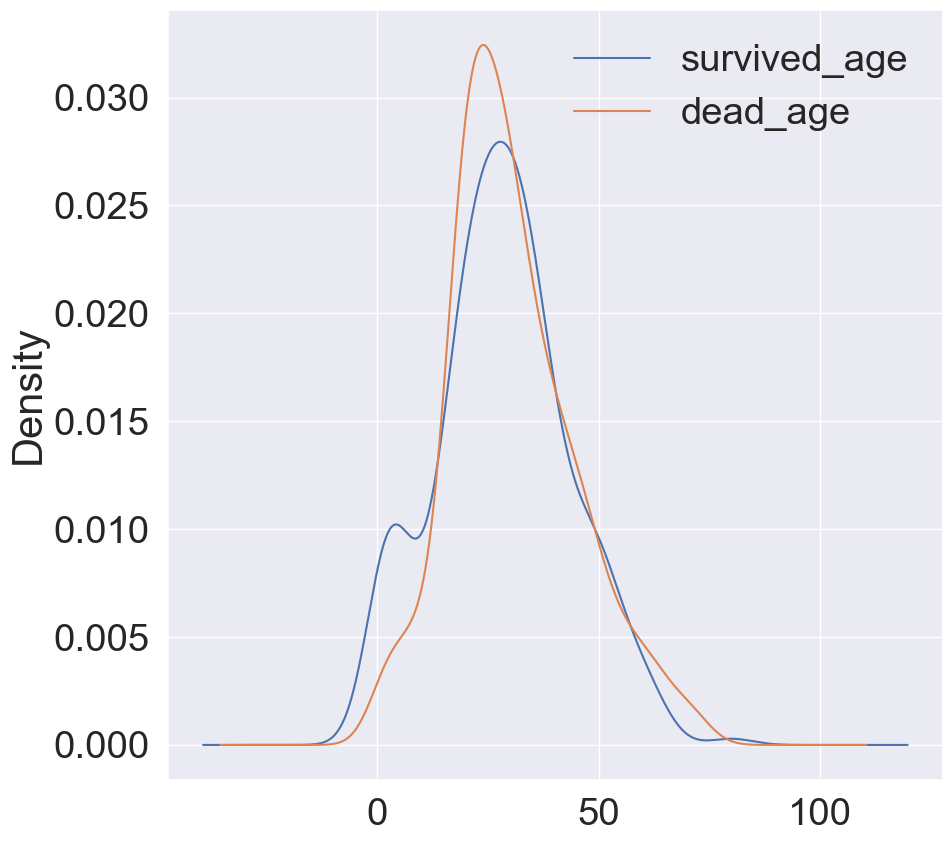

In [24]:
#각 나이별 survived_age와 dead_age 비율을 그래프로 그림

#그래프의 크기 설정(가로 10, 세로 10)
plt.figure(figsize = (10, 10))

#데이터의 비율을 그래프로 그림
survived_age.plot(kind = 'kde')
dead_age.plot(kind = 'kde')

#범례 설정
plt.legend(['survived_age', 'dead_age'])

In [25]:
#위와 같이 생존자 중 나이가 어릴수록 생존률이 높음

In [26]:
#승선한 항(Embarked)과 생존률 탐색

#Embarked 컬럼과 Survived 컬럼을 교차해서 빈도수, 빈도수의 합계를 출력
pd.crosstab(df_train['Embarked'], df_train['Survived'], margins = True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [27]:
#위와 같이 조금의 차이는 있으나 생존률은 비슷(C가 가장 높음)

In [28]:
#Embarked 컬럼과 Pclass 컬럼을 교차해서 빈도수, 빈도수의 합계를 출력
pd.crosstab(df_train['Embarked'], df_train['Pclass'], margins = True)

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


In [29]:
#Figure(4) - Class로 split하여 확인하면
#C의 생존률이 높은 이유는 클래스가 높은 사람이 많이 타서 그렇다는 것을 알 수 있음
#S의 생존률이 낮은 이유는 3rd 클래스가 많기 때문

In [30]:
#상관관계 분석
#컬럼의 기울임 정보 파악

#Survived 컬럼과의 상관관계 출력
df_train.corr(numeric_only=True)["Survived"]

#또는 !pip uninstall pandas -y
#!pip install pandas==1.5.3

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [31]:
#각 컬럼의 기울기 조회
df_train.skew(numeric_only=True)

PassengerId    0.000000
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Survived       0.478523
dtype: float64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

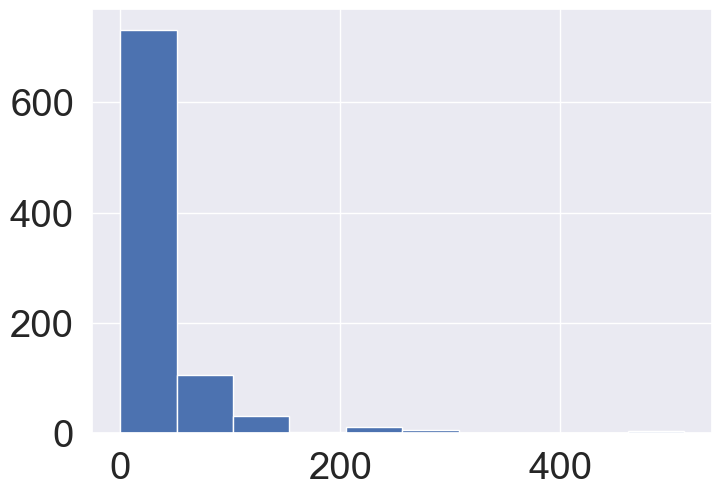

In [32]:
#기울기가 가장 높은 컬럼 시각화
plt.hist(df_train["Fare"])

In [33]:
#Fare에 log(데이터+1)를 곱한 값을 리턴하는 np.log1p 호출
df_train["Fare"] = np.log1p(df_train["Fare"])

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <BarContainer object of 10 artists>)

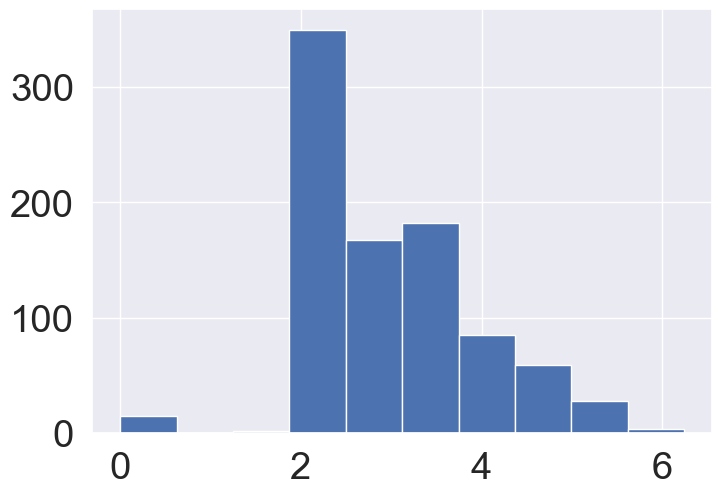

In [34]:
plt.hist(df_train["Fare"])

In [35]:
#전처리- 결측치가 있는 행에 값 대입
#가족과 같이 탑승한 승객, 혼자 탑승한 승객을 비교하여 가족수와 생존률 관계 파악
#가족수 컬럼 추가

#배우자 수와 부모 아이수를 합해서 FamilySize 컬럼 생성
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [36]:
#FamilySize와 Survived칸을 교차해서 빈도수 출력
pd.crosstab(df_train['FamilySize'], df_train['Survived'], margins = True)

Survived,0,1,All
FamilySize,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7


In [37]:
#가족이 4명인 경우가 가장 생존확률이 높음
#가족 수가 많아질수록(5 이상) 생존확률 낮아짐
#가족 수가 너무 작아도(1) 생존확률 낮음
#가족 수가 3~4명인 경우 생존확률 높음

In [38]:
#성별, 나이를 나타내는 Sir 컬럼 추가
#여자인 경우 미혼이 기혼보다 나이가 어릴 것으로 생각됨으로 Miss, Mrs 컬럼 추가
#남자인 경우 Mr(성인남자), Master(귀족 집안의 미성년남자) 컬럼 추가

#name 컬럼을 리스트로 변환
name_list = df_train["Name"].tolist()

In [39]:
import re

#다음 단어 중 하나를 포함하는 문자열을 찾기 위한 객체 p 생성
p = re.compile("Mrs|Mr|Miss|Master|Don|Dr|Ms|Major|Mlle|Mme|Countess|Lady|Don|Countess")

In [40]:
for name in name_list:
    #p에 대입된 문자열과 name이 일치하는 문자열을 리턴받아서 출력
    if p.search(name) != None:
        print(p.search(name)[0])
    else:
        print("Other")

Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Dr
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Mr
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Master
Mr
Mr
Miss
Mr
Dr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Other
Other
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Master
Mr
Mrs
Mr
Mr
Master
Master
Mrs
Mrs
Mr
Mr
Mr
Master
Miss
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Master
Master
Miss
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Miss
Master
Mrs
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Dr
Miss
Mrs
Mr
Other
Mr
Mrs
Mr
Mr
Mrs
Mrs
Mrs
Miss
Miss
M

In [41]:
#기혼 여성을 지칭하는 Countess, Lady, Mrs를 Mrs로 변경
#미혼 여성을 지칭하는 Mme, Ms, Mlle를 Miss로 변경
#성인 남성을 지칭하는 Don, Dr, Major를 Mr로 변경

sir = []

for name in name_list:
    if p.search(name) != None:
        if p.search(name)[0] in ['Countess', "Lady", "Mrs"]:
            sir.append("Mrs")
        elif p.search(name)[0] in ["Mme", "Ms", "Mlle"]:
            sir.append("Miss")
        elif p.search(name)[0] in ["Don", "Dr", "Major"]:
            sir.append("Mr")
        else:
            sir.append(p.search(name)[0])
    else:
        sir.append("Other")

sir

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr

In [42]:
#sir을 포함하는 데이터프레임 칸 생성
pd.Series(sir)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Length: 891, dtype: object

In [43]:
#빈도수 조회
pd.Series(sir).value_counts()

Mr        530
Miss      185
Mrs       126
Master     40
Other      10
Name: count, dtype: int64

In [44]:
#df_train에 Sir이라는 칸 이름으로 추가
df_train["Sir"] = pd.Series(sir)
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize,Sir
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S,0,2,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C,1,2,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,1,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S,1,2,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S,0,1,Mr


In [45]:
#Sir과 Survived의 빈도수를 교차해서 출력
pd.crosstab(df_train['Sir'], df_train['Survived'], margins=True)

Survived,0,1,All
Sir,,,
Master,17,23,40
Miss,55,130,185
Mr,442,88,530
Mrs,26,100,126
Other,9,1,10
All,549,342,891


In [46]:
#결측치 처리
#기혼 여성이 미혼보다 나이가 많을것으로 생각됨
#Master의 나이는 어릴것으로 생각됨
#Sir 컬럼에 Mrs, Miss, Master를 이용하여 나이 결측치를 처리
#나이가 결측치인 행은 Sir컬럼의 같은 값을 행의 평균값으로 치환

#Sir 컬럼을 기준으로 평균 계산
df_train.groupby('Sir').mean(numeric_only=True)["Age"]

Sir
Master     4.574167
Miss      21.860000
Mr        32.651589
Mrs       36.000000
Other     48.300000
Name: Age, dtype: float64

In [47]:
df_train.groupby('Sir').mean(numeric_only=True)["Age"]

Sir
Master     4.574167
Miss      21.860000
Mr        32.651589
Mrs       36.000000
Other     48.300000
Name: Age, dtype: float64

In [48]:
#Sir 컬럼의 값이 "Mrs"인 데이터의 평균
df_train.groupby('Sir').mean(numeric_only=True).loc["Mrs"]

PassengerId    456.706349
Pclass           1.984127
Age             36.000000
SibSp            0.690476
Parch            0.817460
Fare             3.485083
Survived         0.793651
FamilySize       2.507937
Name: Mrs, dtype: float64

In [49]:
#Sir 컬럼의 값이 "Mrs"인 데이터의 나이 평균
df_train.groupby('Sir').mean(numeric_only=True).loc["Mrs"]["Age"]

np.float64(36.0)

In [50]:
#Sir 컬럼을 기준으로 평균을 계산하고 sir_df에 대입
sir_df = df_train.groupby('Sir').mean(numeric_only=True)
sir_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,FamilySize
Sir,,,,,,,,
Master,414.975000,2.625000,4.574167,2.300000,1.375000,3.381361,0.575000,4.675000
Miss,413.708108,2.281081,21.860000,0.702703,0.540541,3.192351,0.702703,2.243243
Mr,454.490566,2.384906,32.651589,0.292453,0.150943,2.728141,0.166038,1.443396
Mrs,456.706349,1.984127,36.000000,0.690476,0.817460,3.485083,0.793651,2.507937
Other,582.600000,1.600000,48.300000,0.200000,0.200000,2.848635,0.100000,1.400000


In [51]:
#Age컬럼이 null인 행의 데이터를 Sir값이 일치하는 행의 평균으로 치환

#index: Age컬럼이 null인 줄의 인덱스
#df: df_train
def process_age_null(index, df):
    #index에 해당하는 줄의 "Sir" 칸의 데이터를 row_sir에 대입
    row_sir = df.loc[index]["Sir"]
    #sir_df에서 row_sir의 평균 나이를 sir_mean에 대입
    sir_mean = sir_df.loc[row_sir]["Age"]
    #sir_mean을 index번째 줄의 Age칸에 대입
    df.at[index, "Age"] = sir_mean

In [52]:
#Age칸이 null인 줄 조회
df_train["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [53]:
#Age칸이 null인 줄의 인덱스를 age_null_index에 대입
age_null_index = df_train.index[df_train["Age"].isnull()]

In [54]:
for index in age_null_index:
    process_age_null(index, df_train)

In [55]:
#Embaked 결측치 처리

#Embaked 컬럼에서 null 개수 조회
sum(df_train['Embarked'].isnull())

2

In [56]:
#Embaked 컬럼이 null인 행에 S 대입
df_train['Embarked'].fillna('S', inplace = True)

In [57]:
#데이터 처리
#컬럼에 숫자가 아닌 문자가 저장된 컬럼을 숫자값으로 변환

#나이 데이터 처리

#컬럼의 각 데이터마다 나이를 10으로 나눈 몫을 계산하여 리턴
def category_age(age):
    return age // 10

df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_train['Age_cat']

0      2.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
886    2.0
887    1.0
888    2.0
889    2.0
890    3.0
Name: Age_cat, Length: 891, dtype: float64

In [58]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize,Sir,Age_cat
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S,0,2,Mr,2.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C,1,2,Mrs,3.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,1,1,Miss,2.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S,1,2,Mrs,3.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S,0,1,Mr,3.0


In [59]:
#데이터 수치화

#Sir 컬럼의 Mr, Mrs, Miss, Master, Other 데이터를 수치화

#Sir 컬럼에서 중복을 제외하고 출력
df_train['Sir'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [60]:
#데이터 앞에 인덱스 부여
enumerate(df_train['Sir'].unique())

In [61]:
list(enumerate(df_train['Sir'].unique()))

[(0, 'Mr'), (1, 'Mrs'), (2, 'Miss'), (3, 'Master'), (4, 'Other')]

In [62]:
#인덱스와 데이터를 출력
for data in enumerate(df_train['Sir'].unique()):
    print("index:", data[0], ", data:", data[1])

index: 0 , data: Mr
index: 1 , data: Mrs
index: 2 , data: Miss
index: 3 , data: Master
index: 4 , data: Other


In [63]:
df_train["Sir"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Sir, dtype: object

In [64]:
#Sir 컬럼의 데이터를 숫자로 변환
#0: Mr, 1: Mrs, 2: Miss, 3: Master, 4: Other
for data in enumerate(df_train['Sir'].unique()):
    df_train["Sir"].replace(data[1], data[0], inplace = True)

In [65]:
df_train["Sir"].head()

0    0
1    1
2    2
3    1
4    0
Name: Sir, dtype: int64

In [66]:
#Embarked 컬럼의 S, C, Q를 수치형 데이터로 전환
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [67]:
#Embarked 컬럼에 인덱스 추가
list(enumerate(df_train['Embarked'].unique()))

[(0, 'S'), (1, 'C'), (2, 'Q')]

In [68]:
for data in enumerate(df_train['Embarked'].unique()):
    print("index:", data[0], ", data:", data[1])

index: 0 , data: S
index: 1 , data: C
index: 2 , data: Q


In [69]:
df_train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [70]:
#Embarked 컬럼의 데이터를 숫자로 변환
#0: S, 1: C, 2: Q
for data in enumerate(df_train['Embarked'].unique()):
    df_train['Embarked'].replace(data[1], data[0], inplace = True)

In [71]:
df_train['Embarked'].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

In [72]:
#Sex 컬럼 처리
df_train["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [73]:
#Sex 컬럼의 데이터를 숫자로 변환
#0: male, 1: female
for data in enumerate(df_train['Sex'].unique()):
    df_train['Sex'].replace(data[1], data[0], inplace = True)

In [74]:
df_train["Sex"].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [75]:
#컬럼 삭제
#생존과 관련이 없는 컬럼, 결측치가 대부분인 컬럼, 한가지 값이 대부분인 컬럼 삭제

df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize,Sir,Age_cat
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,2.110213,NaN,0,0,2,0,2.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.280593,C85,1,1,2,1,3.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.188856,NaN,0,1,1,2,2.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.990834,C123,0,1,2,1,3.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.202765,NaN,0,0,1,0,3.0


In [76]:
#PassengerId, Cabin, Ticket, Name, Age 컬럼 삭제
df_train.drop(["PassengerId", "Cabin", "Ticket", "Name", "Age"], axis = 1, inplace = True)

In [77]:
df_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived,FamilySize,Sir,Age_cat
0,3,0,1,0,2.110213,0,0,2,0,2.0
1,1,1,1,0,4.280593,1,1,2,1,3.0
2,3,1,0,0,2.188856,0,1,1,2,2.0
3,1,1,1,0,3.990834,0,1,2,1,3.0
4,3,0,0,0,2.202765,0,0,1,0,3.0


In [78]:
#데이터 분류
#학습 데이터와 테스트 데이터 분리

#예측하고자 하는 "Survived" 컬럼을 y_label 컬럼에 대입
y_label = df_train["Survived"]

#df_train에서 "Survived" 컬럼 삭제
df_train.drop("Survived", axis = 1, inplace = True)

In [79]:
y_label.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [80]:
df_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,FamilySize,Sir,Age_cat
0,3,0,1,0,2.110213,0,2,0,2.0
1,1,1,1,0,4.280593,1,2,1,3.0
2,3,1,0,0,2.188856,0,1,2,2.0
3,1,1,1,0,3.990834,0,2,1,3.0
4,3,0,0,0,2.202765,0,1,0,3.0


In [81]:
from sklearn.model_selection import train_test_split

#전체 데이터 중 75%를 학습용, 25%를 테스트용 데이터로 추출
#random_state를 설정하여 매번 실행때마다 같은 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(df_train, y_label, random_state = 156)

In [82]:
#의사결정트리

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

In [83]:
dt_clf = DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier()

In [84]:
#의사결정트리를 이용한 학습
dt_clf = dt_clf.fit(X_train, y_train)

#테스트 데이터 예측
dt_prediction = dt_clf.predict(X_test)
dt_prediction

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [85]:
#모델 성능 평가
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, dt_prediction, labels = [1, 0])

array([[ 65,  21],
       [ 18, 119]])

In [86]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, dt_prediction)
print("정확도: ", accuracy)

정확도:  0.8251121076233184


In [87]:
#컬럼 이름의 리스트 리턴
feature_names = df_train.columns.tolist()
feature_names

['Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'FamilySize',
 'Sir',
 'Age_cat']

In [88]:
target_name = np.array(["Dead", "Survived"])
target_name

array(['Dead', 'Survived'], dtype='<U8')

In [89]:
#트리를 그래프로 생성
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

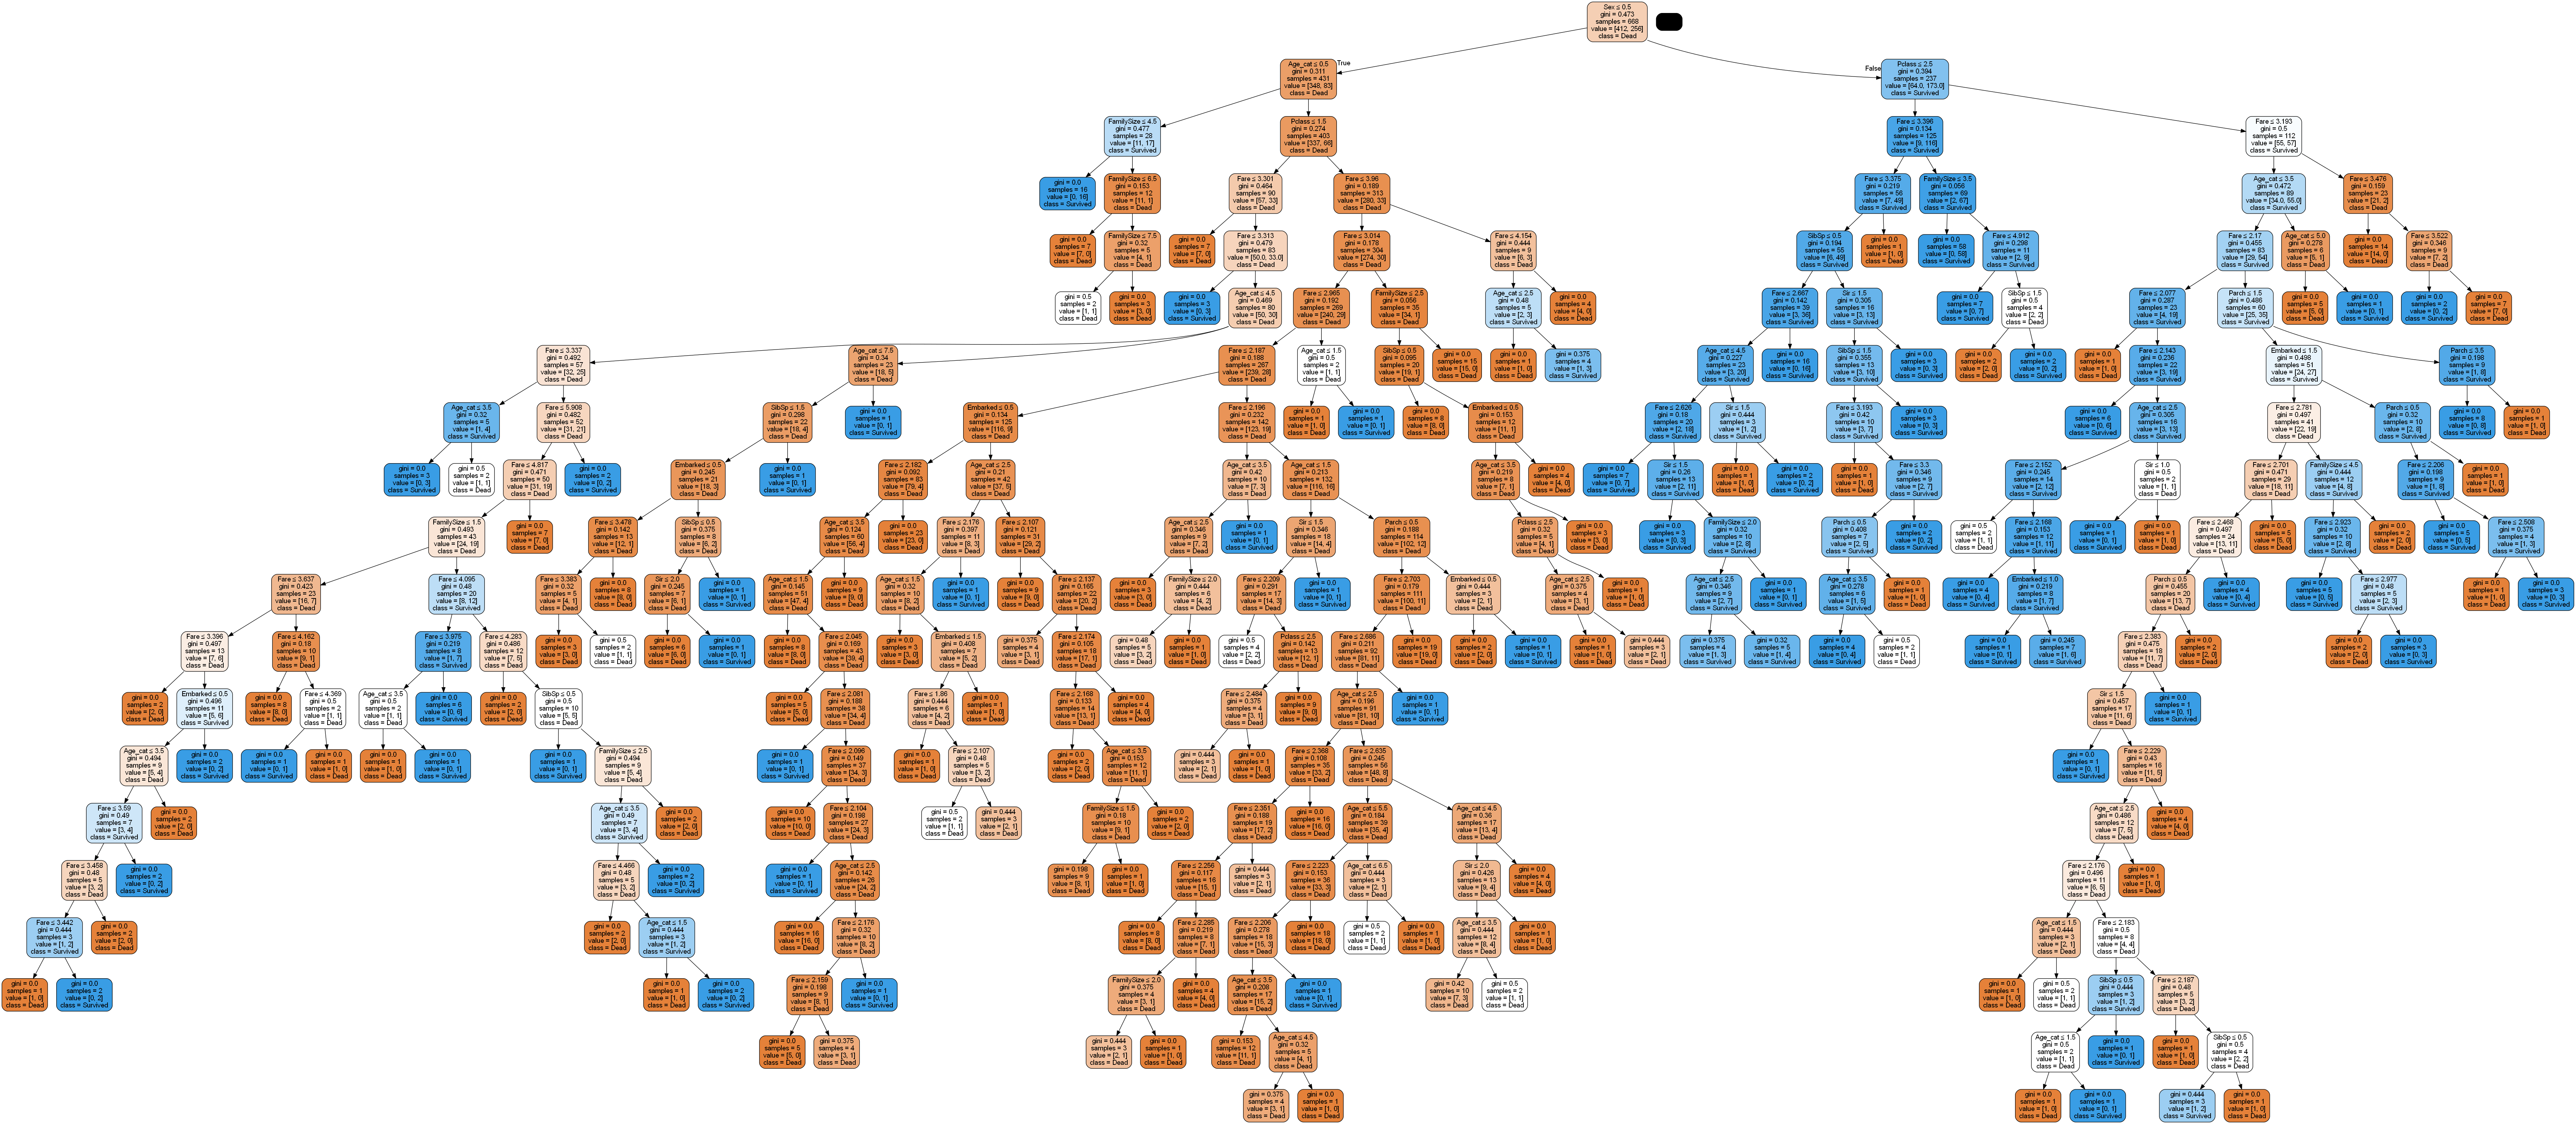

In [90]:
import pydotplus

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [91]:
#트리를 pdf문서로 출력
dt_graph.write_pdf("tatinic.pdf")

True

In [92]:
#1등석 고객(Pclass: 1)
#남자(Sex: 0)
#합께 탑승한 형제와 배우자 수 1(SibSp: 1)
#합께 탑승한 부모 아이의 수 2(Parch: 2)
#탑승료 250불(Fare: 250)
#C 항구에서 탑승(Embarked: 1)
#전체 가족수 3명(FamilySize: 3)
#남자 성인(Sir: 0)
#41살(Age_cat: 4.0)
new_data = np.array([[1, 0, 1, 2, np.log1p(250), 1, 3, 0, 4.0]])
new_data

array([[1.        , 0.        , 1.        , 2.        , 5.52545294,
        1.        , 3.        , 0.        , 4.        ]])

In [93]:
dt_clf.predict(new_data)

array([0])

In [94]:
#사망

In [95]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
import numpy as np

In [96]:
#RandomForestClassifier 객체 생성 후 rf_clf에 대입
rf_clf = RandomForestClassifier()

In [97]:
#학습데이터를 이용하여 트리 생성
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
#X_test 데이터를 예측하고 결과 리턴
pred = rf_clf.predict(X_test)

In [99]:
#y_test와 pred를 비교하여 정확도 출력
accuracy = accuracy_score(y_test, pred)
print('랜덤포레스트 정확도: {}'.format(accuracy))

랜덤포레스트 정확도: 0.852017937219731


In [100]:
#의사결정나무의 정확도(0.83)보다 향상

In [112]:
#XGBoost 알고리즘을 이용한 트리 생성

from xgboost import XGBClassifier

#XGBoost를 구성하는 트리의 개수를 10개로 객체를 생성하여 리턴
xgboost = XGBClassifier(n_estimator = 100)

xgboost.fit(X_train, y_train, eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.54381
[1]	validation_0-logloss:0.47472
[2]	validation_0-logloss:0.43696
[3]	validation_0-logloss:0.41635
[4]	validation_0-logloss:0.40169
[5]	validation_0-logloss:0.39166
[6]	validation_0-logloss:0.38643
[7]	validation_0-logloss:0.37982
[8]	validation_0-logloss:0.37433
[9]	validation_0-logloss:0.37335
[10]	validation_0-logloss:0.37614
[11]	validation_0-logloss:0.37461
[12]	validation_0-logloss:0.37534
[13]	validation_0-logloss:0.37428
[14]	validation_0-logloss:0.37668
[15]	validation_0-logloss:0.37347
[16]	validation_0-logloss:0.37318
[17]	validation_0-logloss:0.37314
[18]	validation_0-logloss:0.37632
[19]	validation_0-logloss:0.37479
[20]	validation_0-logloss:0.37578
[21]	validation_0-logloss:0.37537
[22]	validation_0-logloss:0.37280
[23]	validation_0-logloss:0.37275
[24]	validation_0-logloss:0.37368
[25]	validation_0-logloss:0.37472
[26]	validation_0-logloss:0.37672
[27]	validation_0-logloss:0.37753
[28]	validation_0-logloss:0.37873
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [113]:
#X_test 데이터를 예측하고 결과 리턴
pred = xgboost.predict(X_test)

In [114]:
#y_test와 pred를 비교하여 정확도 출력
accuracy = accuracy_score(y_test, pred)
print('XGBoost 정확도: {}'.format(accuracy))

XGBoost 정확도: 0.8475336322869955


In [115]:
#lightBGM 알고리즘 이용

!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 38.1 MB/s eta 0:00:00


In [119]:
from lightgbm import LGBMClassifier

#트리의 개수를 100개로 설정하고 결과 리턴
lightgbm = LGBMClassifier(n_estimator = 100)

lightgbm.fit(X_train, y_train, eval_set = [(X_test, y_test)])

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Number of positive: 256, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 9
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383234 -> initscore=-0.475846
[LightGBM] [Info] Start training from score -0.475846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(n_estimator=100)

In [120]:
#X_test 데이터를 예측하고 결과 리턴
pred = lightgbm.predict(X_test)

[LightGBM] [Warning] Unknown parameter: n_estimator
